<a href="https://colab.research.google.com/github/lhiwi/FUTURE_DS_01/blob/main/notebooks/%2001_data_understanding_and_quality_checks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FUTURE_DS_01 — Superstore Sales Analytics


## Data Understanding + Data Quality Audit (Before Cleaning)

Purpose:
- Understand what a row represents (data grain)
- Verify data quality using business “truth rules”
- Profile distributions and skew (so visuals/KPIs are honest)
- Produce a justified cleaning plan (minimal, based on evidence)

Dataset:
- Sample - Superstore.csv (Kaggle Superstore dataset)



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path ="/content/drive/MyDrive/Future_DS/Sample - Superstore.csv"
df_raw= pd.read_csv(path,encoding="ISO-8859-1")
df= df_raw.copy()


In [5]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (9994, 21)
Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


## First look (sanity check)
We preview the first rows and a random sample to see:
- the general format (dates, categories, numeric values)
- whether Order IDs repeat (hinting at line-item grain)
- whether any values look “off” at first glance


In [6]:
# Have a glance of the data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.sample(10, random_state=42)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3125,3126,CA-2015-121720,6/11/2015,6/12/2015,First Class,JE-15610,Jim Epp,Corporate,United States,Lakeland,...,33801,South,OFF-ST-10003816,Office Supplies,Storage,Fellowes High-Stak Drawer Files,563.808,4,0.2,21.1428
1441,1442,CA-2017-128160,12/19/2017,12/24/2017,Second Class,MM-17920,Michael Moore,Consumer,United States,San Francisco,...,94110,West,OFF-BI-10001510,Office Supplies,Binders,Deluxe Heavy-Duty Vinyl Round Ring Binder,36.672,2,0.2,11.4600
4510,4511,CA-2016-119935,11/10/2016,11/14/2016,Standard Class,KM-16225,Kalyca Meade,Corporate,United States,Springfield,...,65807,Central,FUR-FU-10001085,Furniture,Furnishings,3M Polarizing Light Filter Sleeves,37.300,2,0.0,17.1580
39,40,CA-2015-117415,12/27/2015,12/31/2015,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-CH-10004218,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",212.058,3,0.3,-15.1470
4509,4510,CA-2017-167003,5/23/2017,5/29/2017,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Los Angeles,...,90036,West,FUR-TA-10001520,Furniture,Tables,"Lesro Sheffield Collection Coffee Table, End T...",171.288,3,0.2,-6.4233
1599,1600,CA-2017-158876,11/19/2017,11/21/2017,Second Class,AB-10150,Aimee Bixby,Consumer,United States,Carrollton,...,75007,Central,OFF-AR-10003373,Office Supplies,Art,"Boston School Pro Electric Pencil Sharpener, 1670",99.136,4,0.2,8.6744
7363,7364,CA-2016-127243,11/28/2016,12/4/2016,Standard Class,DS-13180,David Smith,Corporate,United States,Philadelphia,...,19140,East,TEC-PH-10004539,Technology,Phones,Wireless Extenders zBoost YX545 SOHO Signal Bo...,340.182,3,0.4,-73.7061
9951,9952,CA-2017-121559,6/1/2017,6/3/2017,Second Class,HW-14935,Helen Wasserman,Corporate,United States,Indianapolis,...,46203,Central,OFF-BI-10002072,Office Supplies,Binders,Cardinal Slant-D Ring Binders,17.380,2,0.0,8.6900
500,501,US-2016-105578,5/30/2016,6/4/2016,Standard Class,MY-17380,Maribeth Yedwab,Corporate,United States,Parker,...,80134,West,OFF-BI-10001670,Office Supplies,Binders,Vinyl Sectional Post Binders,22.620,2,0.7,-15.0800
4847,4848,CA-2014-164469,6/25/2014,6/27/2014,Second Class,GK-14620,Grace Kelly,Corporate,United States,Salem,...,97301,West,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,71.632,11,0.2,17.9080


## Data dictionary (types + missingness)
This table answers:
- which columns are numeric vs text
- whether any columns have missing values
- which fields will require type conversion (especially dates)


In [8]:
# data dictionary view
dict_view = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.values,
    "non_null": df.notnull().sum().values,
    "nulls": df.isnull().sum().values,
    "null_%": (df.isnull().mean().values * 100).round(2)
}).sort_values("null_%", ascending=False)

dict_view


,column,dtype,non_null,nulls,null_%
0,Row ID,int64,9994,0,0.0
1,Order ID,object,9994,0,0.0
2,Order Date,object,9994,0,0.0
3,Ship Date,object,9994,0,0.0
4,Ship Mode,object,9994,0,0.0
5,Customer ID,object,9994,0,0.0
6,Customer Name,object,9994,0,0.0
7,Segment,object,9994,0,0.0
8,Country,object,9994,0,0.0
9,City,object,9994,0,0.0


## Parse dates (Order Date, Ship Date)
date strings are converted into real datetime types by parsing


In [9]:
# Parse dates properly
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"]  = pd.to_datetime(df["Ship Date"], errors="coerce")

df[["Order Date","Ship Date"]].isna().sum()



,0
Order Date,0
Ship Date,0


## Data grain: what does one row represent?
Checking the uniqueness to decide whether each row is:
- an entire order, or
- a line item (one product line within an order)

This matters because:
- Order IDs repeating is normal in line-item data
- KPI definitions (AOV, order count) depend on grain


In [14]:
# unique counts
df[["Order ID", "Product ID", "Row ID"]].nunique()


,0
Order ID,5009
Product ID,1862
Row ID,9994


In [15]:
# Rows per order
rows_per_order = df.groupby("Order ID").size()
rows_per_order.describe()


,0
count,5009.000000
mean,1.995209
std,1.410671
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,14.000000


## Business truth rules
These checks are “must-be-true” constraints for sales data:
- Sales should not be negative
- Quantity should be positive
- Discount should be within [0, 1]
- Ship Date should not be before Order Date
- Dates should not be missing after parsing

Negative profit is allowed and is often a meaningful business signal (loss-making sales).


In [17]:
# Basic sanity checks
checks = {
    "negative_sales": (df["Sales"] < 0).sum(),
    "negative_profit": (df["Profit"] < 0).sum(),
    "nonpositive_quantity": (df["Quantity"] <= 0).sum(),
    "discount_outside_0_1": ((df["Discount"] < 0) | (df["Discount"] > 1)).sum(),
    "ship_before_order": (df["Ship Date"] < df["Order Date"]).sum(),
    "missing_order_date": df["Order Date"].isna().sum(),
    "missing_ship_date": df["Ship Date"].isna().sum(),
}
checks


{'negative_sales': np.int64(0),
 'negative_profit': np.int64(1871),
 'nonpositive_quantity': np.int64(0),
 'discount_outside_0_1': np.int64(0),
 'ship_before_order': np.int64(0),
 'missing_order_date': np.int64(0),
 'missing_ship_date': np.int64(0)}

## Duplicates
- Exact duplicate rows: same entire record repeated (usually safe to drop)
- Business-key duplicates: same Order ID + Product ID + Sales + Quantity + Discount repeated

Repeating Order ID alone is normal (line-item grain).
We inspect business-key duplicates before deciding to remove anything.


In [18]:
# Duplicate detection
# Exact duplicate rows
exact_dupes = df.duplicated().sum()

# Potential business duplicates (custom key)
key_cols = ["Order ID", "Product ID", "Sales", "Quantity", "Discount"]
key_dupes = df.duplicated(subset=key_cols).sum()

exact_dupes, key_dupes


(np.int64(0), np.int64(1))

In [21]:
# missing values profile
missing = df.isnull().mean().mul(100).sort_values(ascending=False)
missing[missing > 0]


,0


## Distribution + skew scan
Business sales data is usually skewed:
- many small transactions
- a few very large ones

We use percentiles to see the distribution without overreacting to max values.


In [19]:
# scan outliers
numeric_cols = ["Sales", "Profit", "Quantity", "Discount"]
df[numeric_cols].describe(percentiles=[.01, .05, .5, .95, .99]).T


,count,mean,std,min,1%,5%,50%,95%,99%,max
Sales,9994.0,229.858001,623.245101,0.444,2.286000,4.98000,54.4900,956.984245,2481.694600,22638.480
Profit,9994.0,28.656896,234.260108,-6599.978,-319.264953,-53.03092,8.6665,168.470400,580.657882,8399.976
Quantity,9994.0,3.789574,2.225110,1.000,1.000000,1.00000,3.0000,8.000000,11.000000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.000000,0.00000,0.2000,0.700000,0.800000,0.800


## Visualizing skew (Sales & Profit)
Raw histograms of Sales can be hard to interpret due to extreme values.
We use:
1) Histogram of raw values
2) Histogram of log(1 + Sales) to make the distribution readable
3) Boxplots for quick outlier intuition


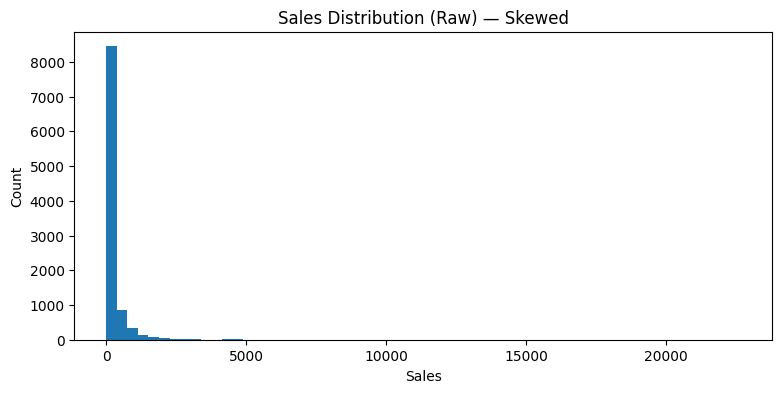

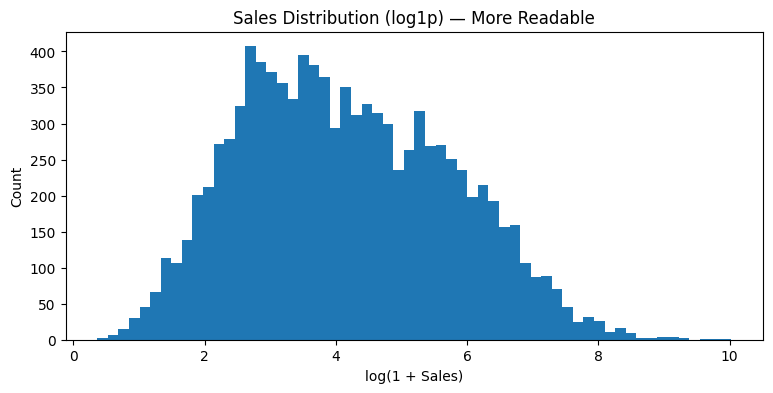

In [20]:
# Histograms: raw and log sales
sales = df["Sales"]

plt.figure(figsize=(9,4))
plt.hist(sales, bins=60)
plt.title("Sales Distribution (Raw) — Skewed")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(9,4))
plt.hist(np.log1p(sales), bins=60)
plt.title("Sales Distribution (log1p) — More Readable")
plt.xlabel("log(1 + Sales)")
plt.ylabel("Count")
plt.show()


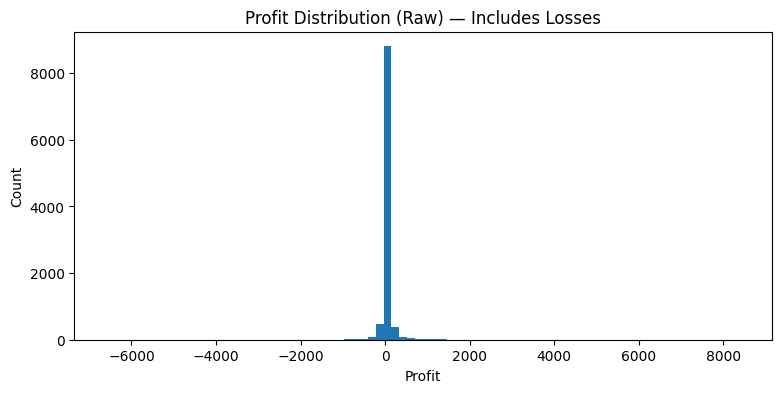

In [21]:
# profit distribution
profit = df["Profit"]

plt.figure(figsize=(9,4))
plt.hist(profit, bins=80)
plt.title("Profit Distribution (Raw) — Includes Losses")
plt.xlabel("Profit")
plt.ylabel("Count")
plt.show()


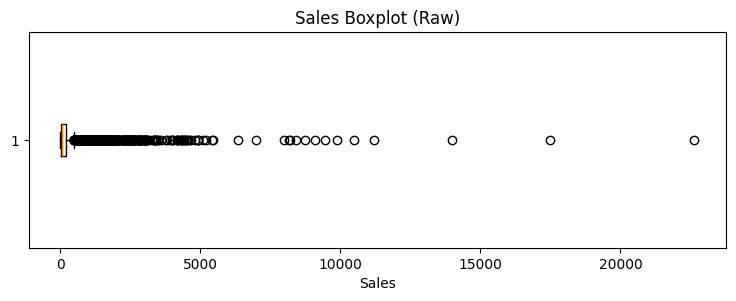

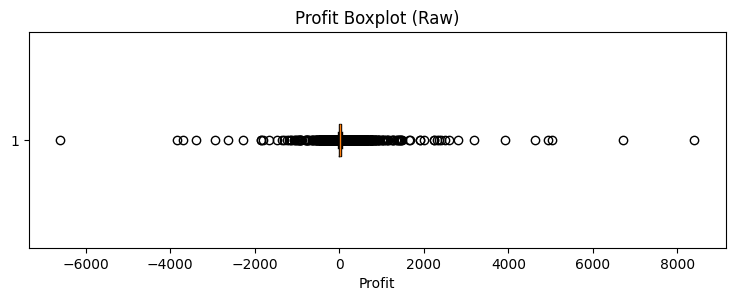

In [22]:
# Boxplots(sales and profit)
plt.figure(figsize=(9,2.8))
plt.boxplot(df["Sales"], vert=False)
plt.title("Sales Boxplot (Raw)")
plt.xlabel("Sales")
plt.show()

plt.figure(figsize=(9,2.8))
plt.boxplot(df["Profit"], vert=False)
plt.title("Profit Boxplot (Raw)")
plt.xlabel("Profit")
plt.show()


## Core KPIs (baseline snapshot)
We compute high-level KPIs to confirm the dataset is coherent and ready for business analysis:
- Total Sales (Revenue)
- Total Profit
- Orders, Customers, Products
- Profit margin (be careful: average of line margins vs overall margin)


In [24]:
# create core KPIs
df["Profit Margin"] = np.where(df["Sales"] != 0, df["Profit"] / df["Sales"], np.nan)

kpis = {
    "total_sales": df["Sales"].sum(),
    "total_profit": df["Profit"].sum(),
    "avg_profit_margin_line_mean": df["Profit Margin"].mean(),
    "orders": df["Order ID"].nunique(),
    "customers": df["Customer ID"].nunique(),
    "products": df["Product ID"].nunique(),
}
kpis


{'total_sales': np.float64(2297200.8603000003),
 'total_profit': np.float64(286397.0217),
 'avg_profit_margin_line_mean': np.float64(0.12031392972104459),
 'orders': 5009,
 'customers': 793,
 'products': 1862}

In [25]:
overall_profit_margin = df["Profit"].sum() / df["Sales"].sum()
aov = df["Sales"].sum() / df["Order ID"].nunique()  # average order value (correct given grain)

overall_profit_margin, aov


(np.float64(0.12467217240315603), np.float64(458.61466566180883))

## Monthly Sales Trend
We aggregate sales by month to:
- validate time behavior (no gaps, no broken dates)
- see growth/seasonality signals
- prepare for deeper driver analysis later (region/category/product)


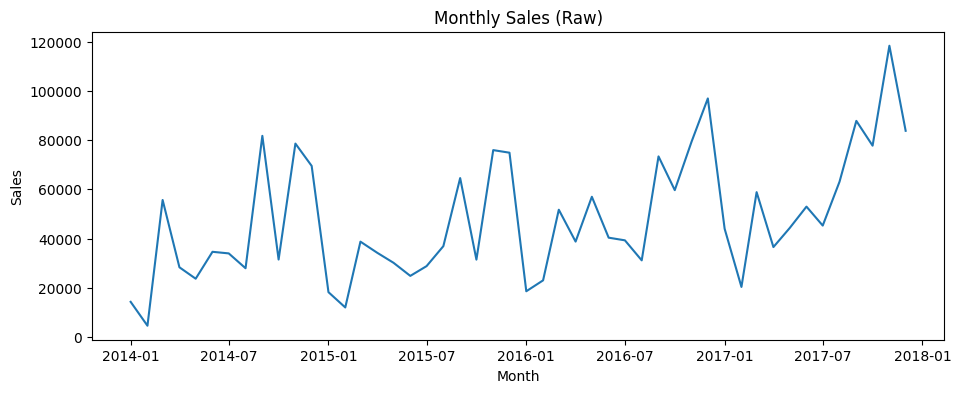

In [26]:
monthly = (
    df.dropna(subset=["Order Date"])
      .assign(month=lambda x: x["Order Date"].dt.to_period("M").dt.to_timestamp())
      .groupby("month")[["Sales", "Profit"]].sum()
)

plt.figure(figsize=(11,4))
plt.plot(monthly.index, monthly["Sales"])
plt.title("Monthly Sales (Raw)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


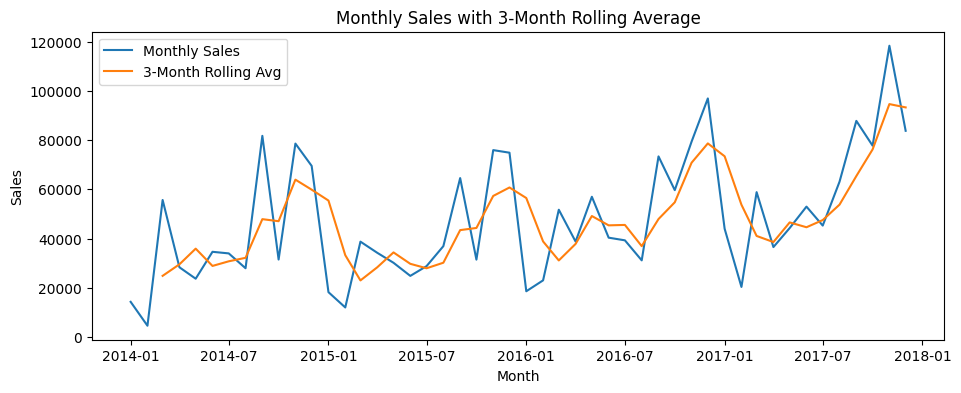

In [27]:
# rolling average
rolling = monthly["Sales"].rolling(3).mean()

plt.figure(figsize=(11,4))
plt.plot(monthly.index, monthly["Sales"], label="Monthly Sales")
plt.plot(rolling.index, rolling, label="3-Month Rolling Avg")
plt.title("Monthly Sales with 3-Month Rolling Average")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()
